# Forced vibrations

Many disciplines, from physics to materials science to electrical engineering, study vibrating phenomena.
Modeling such oscillatory behavior is conveniently handled with differential equations, so we need to be equipped to solve them.
Here we will solving a differential equation for a mass-spring system using Fourier series.

## Summary of commands

In this exercise, we will demonstrate the following:
- [`ax.stem(x, y)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.stem.html) - Plots a graph of discrete points at `x` positions with stems of height `y` extending down to a baseline (usually $y=0$).

We will continue to build on the commands used in the previous exercise as well.

## Forcing a mass-spring system

Forced oscillations of a body of mass $m$ on a spring of modulus $k$ are governed by the equation:

$$ m \dfrac{d^2 y}{dt^2} + \lambda \dfrac{dy}{dt} + ky = f(t) \tag{1} $$

with
- $y(t)$: displacement of the mass from rest
- $\lambda$: damping constant
- $f(t)$: external force depending on time applied to the mass-spring system

Using $\lambda = 0.02$ g⋅m/s, $k = 40$ g⋅m/s², $m = 0.05$ g⋅m and the following external force:

$$ f(t) = \begin{cases} t - \dfrac{1}{2} & 0 < t < 1 \\ -t -\dfrac{1}{2} & -1 < t < 0 \end{cases} \quad \text{and} \quad f(t+2) = f(t) $$

(a) Solve equation (1) using Fourier series.    
(b) Plot:
- the forcing function
- the displacement of the mass
- the contribution of each frequency component to the final solution.

What is the relation between the two last plots?

### Analytical solution

The Fourier series of the external force is

$$ f(t) = \sum_{n\, \text{odd}} - \frac{4}{n^2 \pi^2} \cos (n \pi t) $$

Assuming a solution of the form 

$$ y(t) = \sum_{n = 1}^{\infty} A_n \cos (n \pi t) + B_n \sin(n \pi t), $$

we obtain the following Fourier coefficients:

$$ \begin{align}
A_n &= \frac{4}{n^2 \pi^2} \frac{m n^2 \pi^2 - k}{(mn^2 \pi^2 - k)^2 + (\lambda n \pi)^2} \\
B_n &= -\frac{4}{n^2 \pi^2} \frac{\lambda n \pi}{(mn^2 \pi^2 - k)^2 + (\lambda n \pi)^2}
\end{align} $$

The contribution of each frequency component to the final solution is given by $C_n = \sqrt{A_n^2 + B_n^2}$.

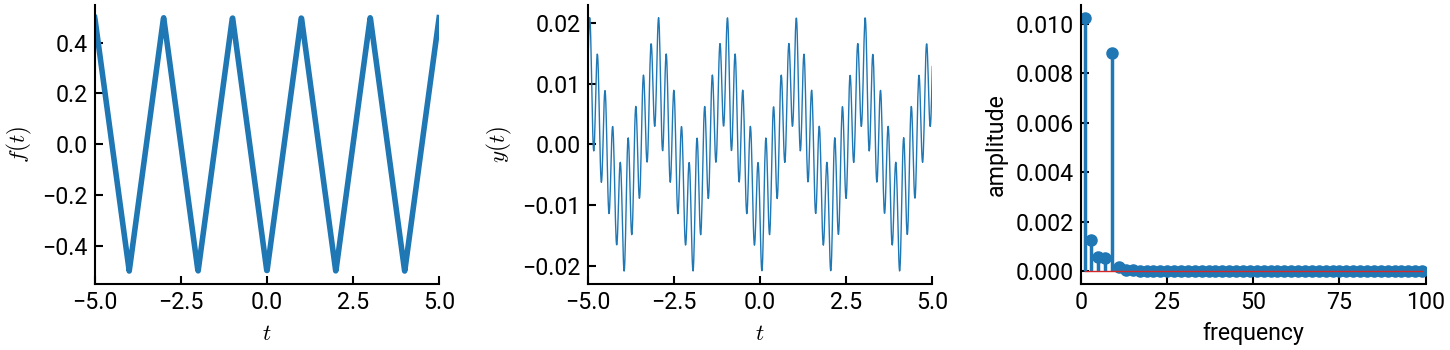

In [6]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# parameters
m = 0.05
k = 40
L = 0.02
nmax = 100
ns = np.arange(1, nmax, 2)

# initialization
t = np.linspace(-5, 5, 1000)
f = np.zeros(t.shape)
y = np.zeros(t.shape)
Cn = []

for n in ns:
    An = 4 / (n**2 * np.pi**2) * (m * n**2 * np.pi**2 - k) / ((m * n**2 * np.pi**2 - k)**2 + (L * n * np.pi)**2)
    Bn = -4 / (n**2 * np.pi**2) * (L * n * np.pi) / ((m * n**2 * np.pi**2 - k)**2 + (L * n * np.pi)**2)
    Cn.append(np.sqrt(An**2 + Bn**2))
    y += An * np.cos(n * np.pi * t) + Bn * np.sin(n * np.pi * t)
    f += -4 / (n * np.pi)**2 * np.cos(n * np.pi * t)

fig, ax = plt.subplots(ncols=3, figsize=(15,4))
ax[0].plot(t, f)
ax[0].set(xlabel='$t$', ylabel='$f(t)$', xlim=[-5,5])
ax[1].plot(t, y, lw=1)
ax[1].set(xlabel='$t$', ylabel='$y(t)$', xlim=[-5,5])
ml, sl, bl = ax[2].stem(ns, Cn)
sl.set_linewidth(2.5)
bl.set_linewidth(1)
ax[2].set(xlabel='frequency', ylabel='amplitude', xlim=[0,nmax])
plt.tight_layout()
plt.show()

We see on the last plot that two frequencies have larger contributions to the final response.
These two frequencies appear clearly on the plot of the displacement: the signal is composed of a low frequency upon which a higher frequency is superposed.

```{note}
This is very minor, but you may have noticed how with the stem plot, we can only set its attributes after the fact, similar to Axes objects, but unlike the `plot()` command. 🤷🏼
```